In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [4]:
df = pd.read_csv("C:/Users/saiwi/OneDrive/Desktop/StudentsPerformance.csv")
print(df.head())

   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  


In [5]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [7]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [8]:
#gender distribution


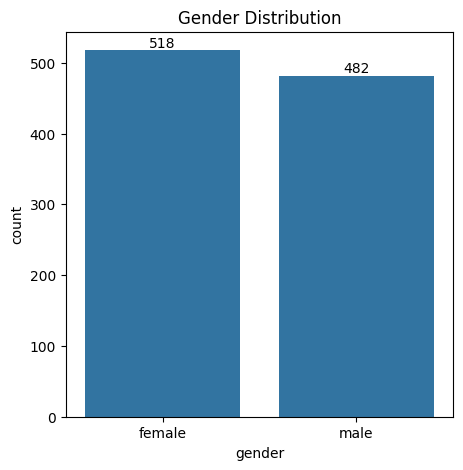

In [24]:
plt.figure(figsize = (5,5))
ax = sns.countplot(data = df , x = "gender")
ax.bar_label(ax.containers[0])
plt.title("Gender Distribution")
plt.show()

In [17]:
gb = df.groupby("parental level of education").agg({"math score": "mean","reading score":"mean","writing score":"mean"})
print(gb)

                             math score  reading score  writing score
parental level of education                                          
associate's degree            67.882883      70.927928      69.896396
bachelor's degree             69.389831      73.000000      73.381356
high school                   62.137755      64.704082      62.448980
master's degree               69.745763      75.372881      75.677966
some college                  67.128319      69.460177      68.840708
some high school              63.497207      66.938547      64.888268


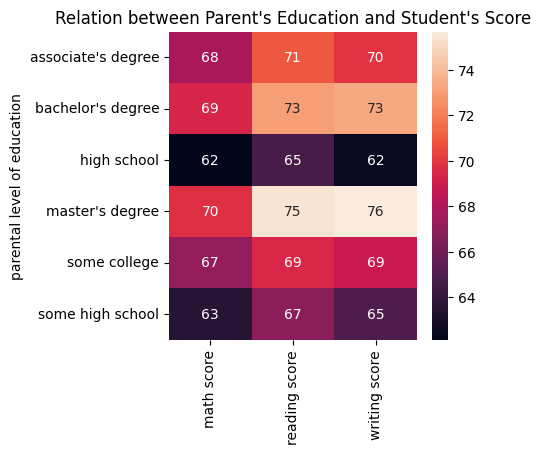

In [25]:
plt.figure(figsize = (4,4))
sns.heatmap(gb, annot=True)
plt.title("Relation between Parent's Education and Student's Score")
plt.show()

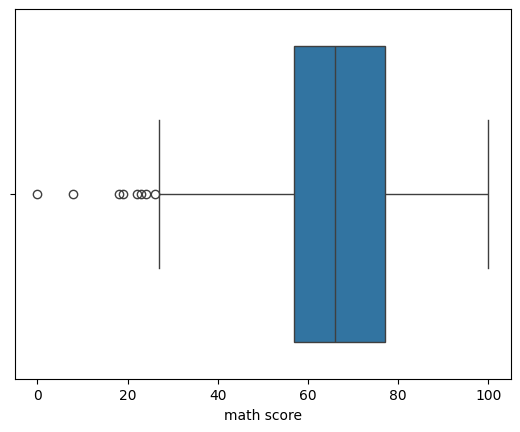

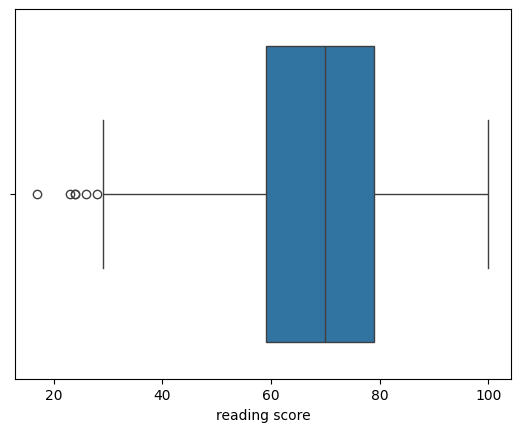

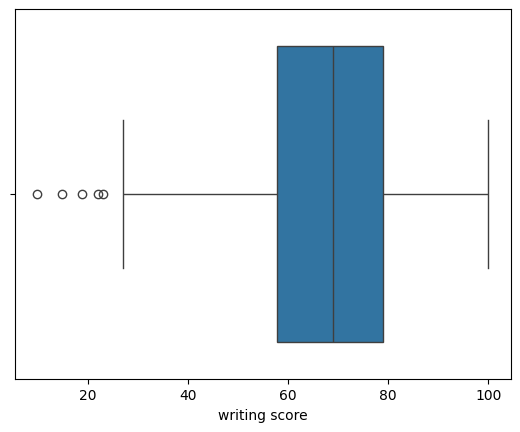

In [31]:
sns.boxplot(data = df, x ="math score")
plt.show()
sns.boxplot(data = df, x ="reading score")
plt.show()
sns.boxplot(data = df, x ="writing score")
plt.show()

In [32]:
print(df["race/ethnicity"].unique())

['group B' 'group C' 'group A' 'group D' 'group E']


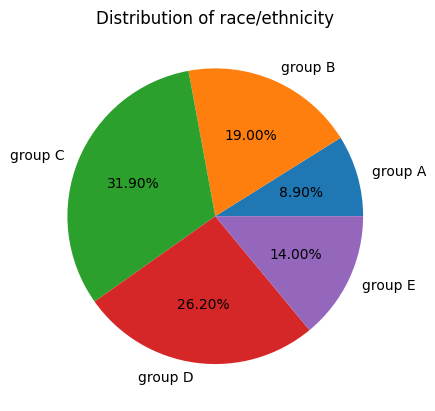

In [56]:
groupA = df.loc[(df["race/ethnicity"] == "group A")].count()
groupB = df.loc[(df["race/ethnicity"] == "group B")].count()
groupC = df.loc[(df["race/ethnicity"] == "group C")].count()
groupD = df.loc[(df["race/ethnicity"] == "group D")].count()
groupE = df.loc[(df["race/ethnicity"] == "group E")].count()


l = ["group A" , "group B" , "group C" , "group D" , "group E"]
mlist = [groupA["race/ethnicity"],groupB["race/ethnicity"], groupC["race/ethnicity"],groupD["race/ethnicity"],groupE["race/ethnicity"]]

plt.pie(mlist, labels=l, autopct = "%1.2f%%")
plt.title("Distribution of race/ethnicity")
plt.show()


[Text(0, 0, '190'),
 Text(0, 0, '319'),
 Text(0, 0, '89'),
 Text(0, 0, '262'),
 Text(0, 0, '140')]

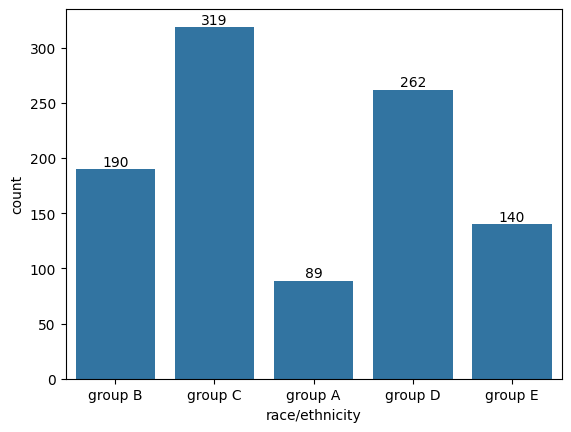

In [54]:
ax = sns.countplot(data =df , x = "race/ethnicity")
ax.bar_label(ax.containers[0])

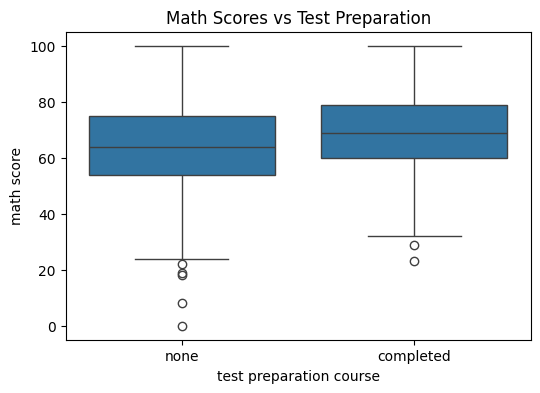

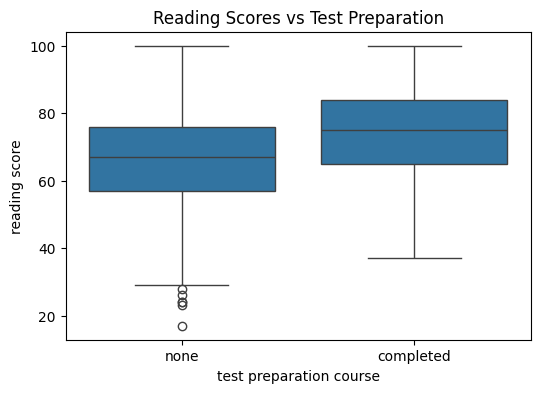

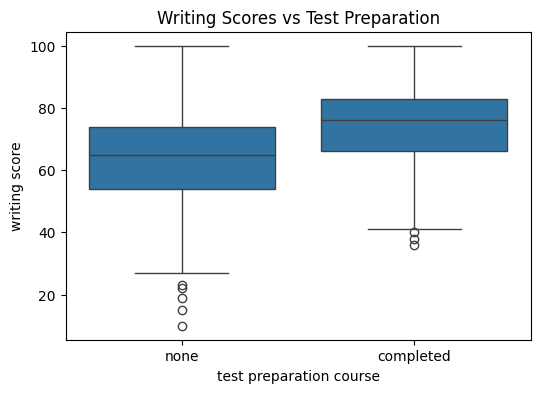

In [59]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='test preparation course', y='math score')
plt.title("Math Scores vs Test Preparation")
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='test preparation course', y='reading score')
plt.title("Reading Scores vs Test Preparation")
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='test preparation course', y='writing score')
plt.title("Writing Scores vs Test Preparation")
plt.show()


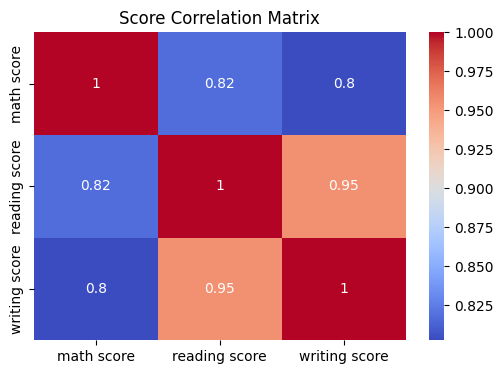

In [60]:
plt.figure(figsize=(6,4))
sns.heatmap(df[['math score', 'reading score', 'writing score']].corr(), annot=True, cmap='coolwarm')
plt.title("Score Correlation Matrix")
plt.show()


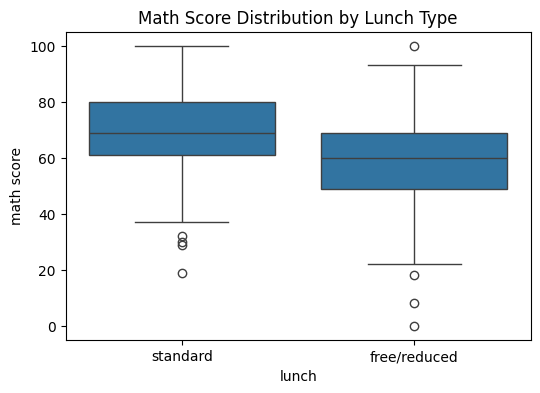

In [61]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='lunch', y='math score')
plt.title("Math Score Distribution by Lunch Type")
plt.show()


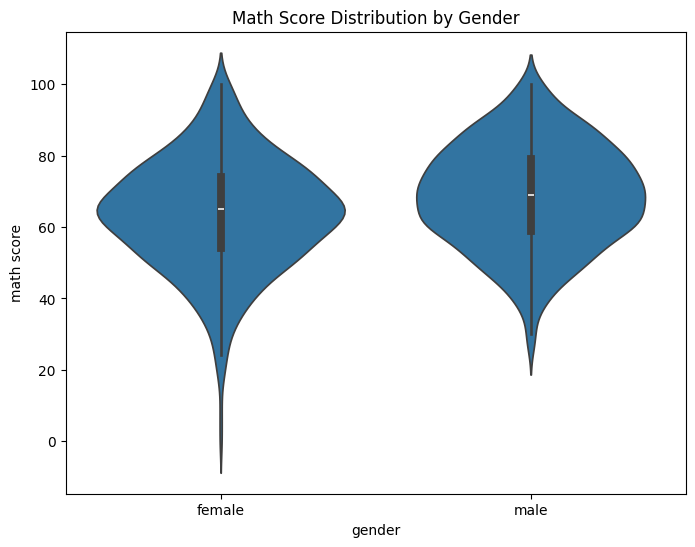

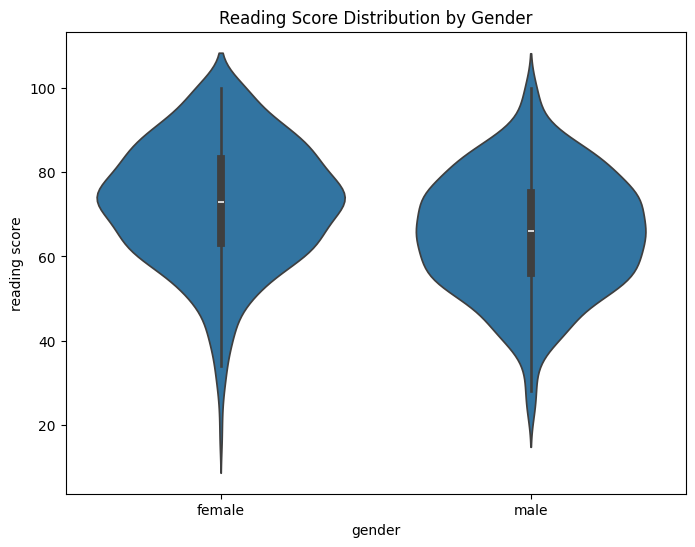

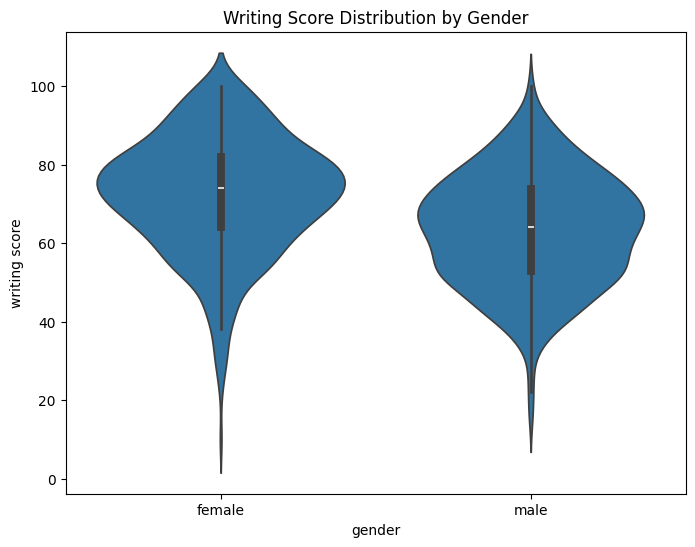

In [62]:
plt.figure(figsize=(8,6))
sns.violinplot(data=df, x='gender', y='math score')
plt.title("Math Score Distribution by Gender")
plt.show()

plt.figure(figsize=(8,6))
sns.violinplot(data=df, x='gender', y='reading score')
plt.title("Reading Score Distribution by Gender")
plt.show()

plt.figure(figsize=(8,6))
sns.violinplot(data=df, x='gender', y='writing score')
plt.title("Writing Score Distribution by Gender")
plt.show()


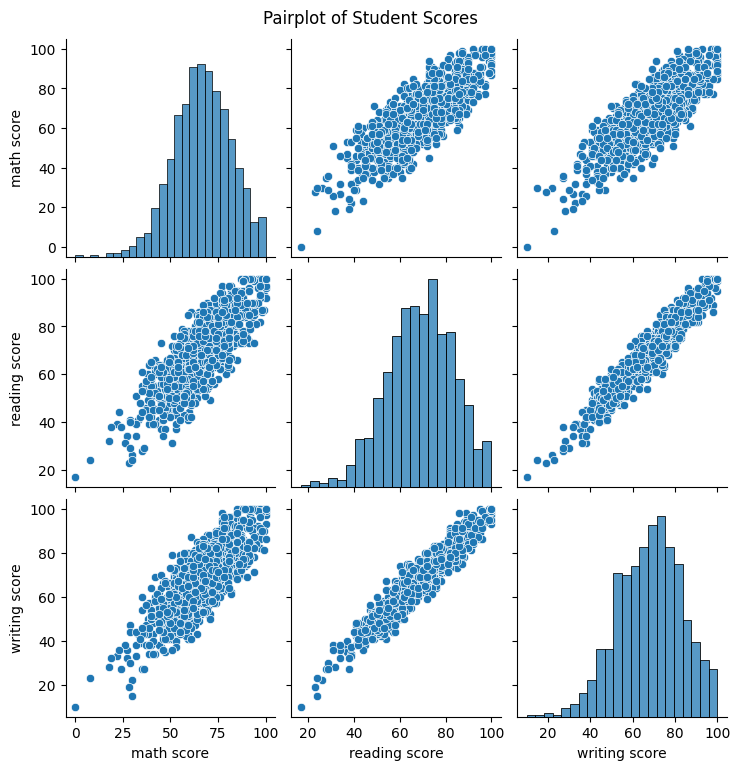

In [63]:
sns.pairplot(df[['math score', 'reading score', 'writing score']])
plt.suptitle("Pairplot of Student Scores", y=1.02)
plt.show()

                math score  reading score  writing score
race/ethnicity                                          
group A          61.629213      64.674157      62.674157
group B          63.452632      67.352632      65.600000
group C          64.463950      69.103448      67.827586
group D          67.362595      70.030534      70.145038
group E          73.821429      73.028571      71.407143


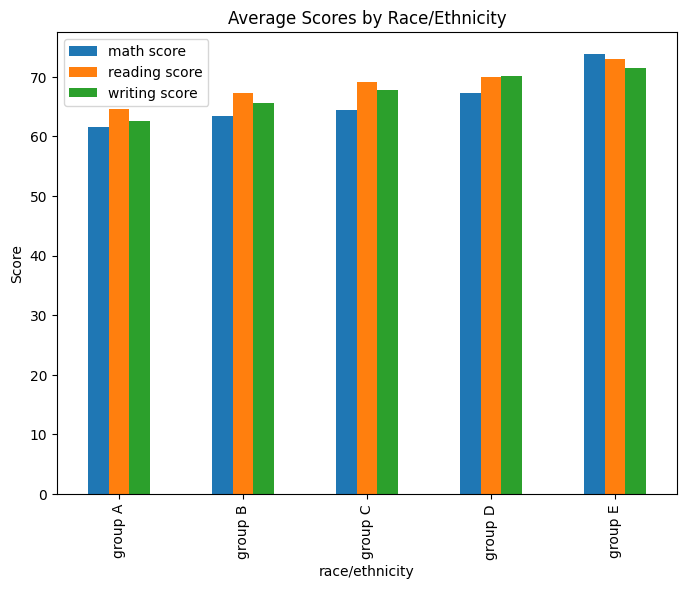

In [64]:
avg_scores_by_race = df.groupby('race/ethnicity')[['math score', 'reading score', 'writing score']].mean()
print(avg_scores_by_race)
avg_scores_by_race.plot(kind='bar', figsize=(8,6))
plt.title("Average Scores by Race/Ethnicity")
plt.ylabel("Score")
plt.show()